# Data Analysis

## Importing required modules and dataset

In [29]:
from matplotlib.colors import ListedColormap
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics

In [2]:
# Import cleaned dataset
dfc = pd.read_csv("../cleaned-data.csv")

How many rows and columns does the dataset have?

In [3]:
dfc.shape

(26106, 18)

Missing Values

In [6]:
# See summary of missing values
dfc.isna().sum()

zip_code                      0
commune                       0
province                      0
type_of_property              0
subtype_of_property           0
price                         0
building_condition            0
facade_number                 0
living_area                   0
equipped_kitchen              0
bedroom_nr                    0
swimming_pool                 0
furnished                     0
open_fire                     0
terrace                       0
garden                        0
plot_surface                  0
sub_property_group_encoded    0
dtype: int64

Quantitative and Qualitative Features

In [27]:
# Count quantitative (numerical) variables
quantitative_vars = dfc.select_dtypes(include=['int64', 'float64']).columns.to_list()
num_quantitative = len(quantitative_vars)

# Count qualitative (categorical) variables
qualitative_vars = dfc.select_dtypes(include=['object', 'category']).columns.to_list()
num_qualitative = len(qualitative_vars)

print(f"Quantitative variables: {num_quantitative}")
print(f"Qualitative variables: {quantitative_vars}")

print(f"Qualitative variables: {num_qualitative}")
print(f"Qualitative variables: {qualitative_vars}")

Quantitative variables: 17
Qualitative variables: ['zip_code', 'type_of_property', 'price', 'facade_number', 'living_area', 'bedroom_nr', 'swimming_pool', 'furnished', 'open_fire', 'terrace', 'garden', 'plot_surface', 'province_encoded', 'sub_property_group_numeric', 'building_condition_encoded', 'equipped_kitchen_binary', 'terrace_binary']
Qualitative variables: 6
Qualitative variables: ['commune', 'province', 'subtype_of_property', 'building_condition', 'equipped_kitchen', 'sub_property_group_encoded']


## Transformation of Quantitative Features

### Label Encoding of Provinces Based on Average Price per sqm (11 = Most Expensive)

In [7]:
province_mapping = {
    'Brussels': 11,
    'West Flanders': 10,
    'Flemish Brabant': 9,
    'Antwerp': 8,
    'Walloon Brabant': 7,
    'Limburg': 6,
    'East Flanders': 5,
    'Namur': 4,
    'Liège': 3,
    'Luxembourg': 2,
    'Hainaut': 1
}

# Apply the mapping
dfc['province_encoded'] = dfc['province'].map(province_mapping)

### Label Encoding of Subtype of Property Based on Mean Price Per Subtype (5 = Most Expensive)

* 1 (Apartments): 'apartment', 'flat studio', 'penthouse', 'ground floor', 'loft', 'kot'
* 2 (Houses): 'house', 'bungalow', 'town house', 'manor house', 'duplex', 'triplex'
* 3 (Other): 'other property', 'mixed use building', 'service flat', 'apartment block'
* 4 (Rural): 'country cottage', 'farmhouse', 'chalet'
* 5 (Luxury Properties): 'mansion', 'castle', 'exceptional property', 'villa'

In [8]:
# Define grouped mapping with assigned numbers
property_group_mapping = {
    'apartment': 1, 
    'flat studio': 1, 
    'penthouse': 1, 
    'ground floor': 1, 
    'loft': 1, 
    'kot': 1, 
    'triplex': 2, 
    'duplex': 2, 
    'house': 2, 
    'bungalow': 2, 
    'town house': 2, 
    'manor house': 2, 
    'mixed use building': 3, 
    'service flat': 3, 
    'other property': 3, 
    'apartment block': 3, 
    'country cottage': 4, 
    'farmhouse': 4, 
    'chalet': 4, 
    'villa': 5, 
    'mansion': 5, 
    'castle': 5, 
    'exceptional property': 5
}

# Apply the grouped mapping to the column
dfc['sub_property_group_numeric'] = dfc['subtype_of_property'].map(property_group_mapping)

### Label Encoding of Building Condition (3 = best condition)

In [9]:
# Define the mapping based on condition quality
building_condition_mapping = {
    'good': 3,
    'no info': 2,
    'to renovate': 1,
    'to restore': 0
}

# Apply the mapping
dfc['building_condition_encoded'] = dfc['building_condition'].map(building_condition_mapping)

### Binary Encoding of Kitchen

In [10]:
# Binary encoding of kitchen
dfc['equipped_kitchen_binary'] = dfc['equipped_kitchen'].apply(lambda x: 1 if x == 'equipped' else 0)

### Binary Encoding of Terrace

In [11]:
# Encode terrace as binary (Create new column)
dfc['terrace_binary'] = dfc['terrace'].apply(lambda x: 1 if x >= 1 else 0)

## Correlation Between Features

### Defining Custom Color Palette

In [13]:
# Define your custom colors
custom_colors = ['#ececf3', '#cbcbeb', '#9d9de4', '#8382d1', '#615edb', '#464F96', '#2d3880']

# Create a custom colormap
custom_cmap = ListedColormap(custom_colors)

### Defining Custom Labels

In [14]:
# Custom labels for features
custom_labels = {
    'type_of_property': 'Property Type',
    'facade_number': 'Facade Count',
    'living_area': 'Living Area (sqm)',
    'bedroom_nr': 'Bedrooms',
    'swimming_pool': 'Swimming Pool',
    'furnished': 'Furnished',
    'open_fire': 'Open Fire',
    'terrace': 'Terrace',
    'garden': 'Garden',
    'plot_surface': 'Plot Surface (sqm)',
    'province_encoded': 'Province',
    'sub_property_group_numeric': 'Property Subtype',
    'equipped_kitchen_binary': 'Equipped Kitchen',
    'building_condition_encoded': 'Building Condition',
}

### Correlation Matrix Between Features for Houses & Apartments (Price excluded)

#### Creating New DataFrame Containing Only Numerical Values (to Compute Correlation Matrix)

In [15]:
# Create new df for only numerical values
num_dfc_columns = ['type_of_property', 'sub_property_group_numeric', 'price', 'facade_number', 'living_area', 'bedroom_nr', 'building_condition_encoded', 'equipped_kitchen_binary', 'furnished', 'swimming_pool', 'open_fire', 'terrace', 'garden', 'plot_surface', 'province_encoded']

num_dfc = dfc[num_dfc_columns]

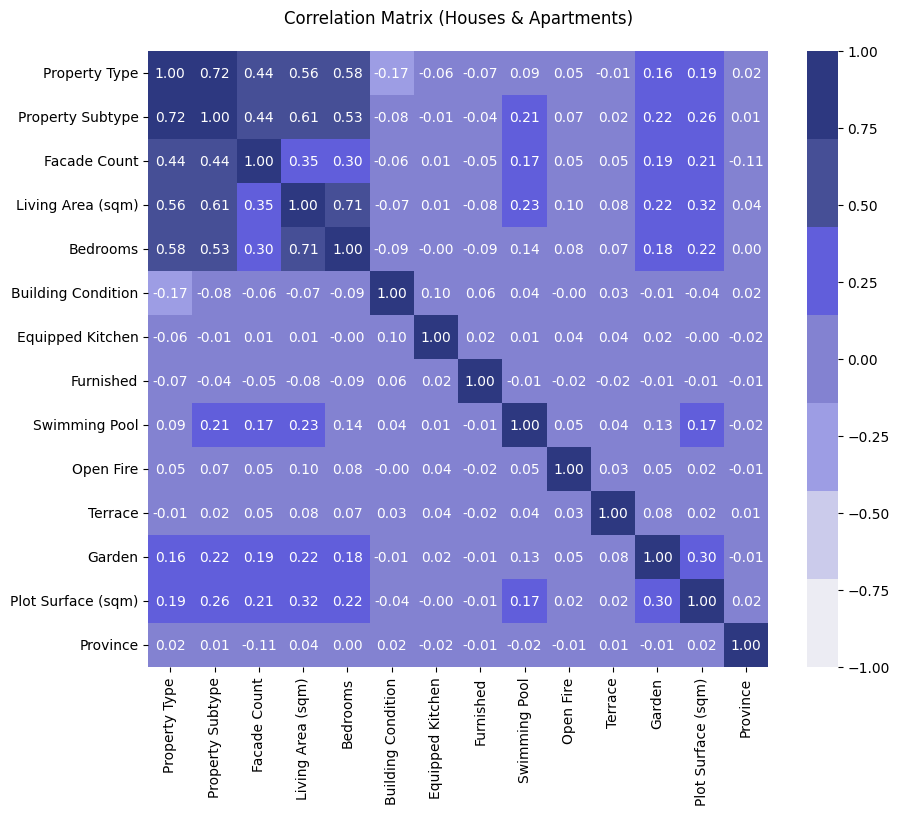

In [20]:
# Correlation matrix houses and apartments combined (excluding price)

# Excluding price
corr_features = num_dfc.corr().drop(index=['price'], columns=['price']).rename(index=custom_labels, columns=custom_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_features, annot=True, cmap=custom_cmap, fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix (Houses & Apartments)", pad=20)
plt.show()

### Correlation Matrix Between Features for Houses (Price excluded)

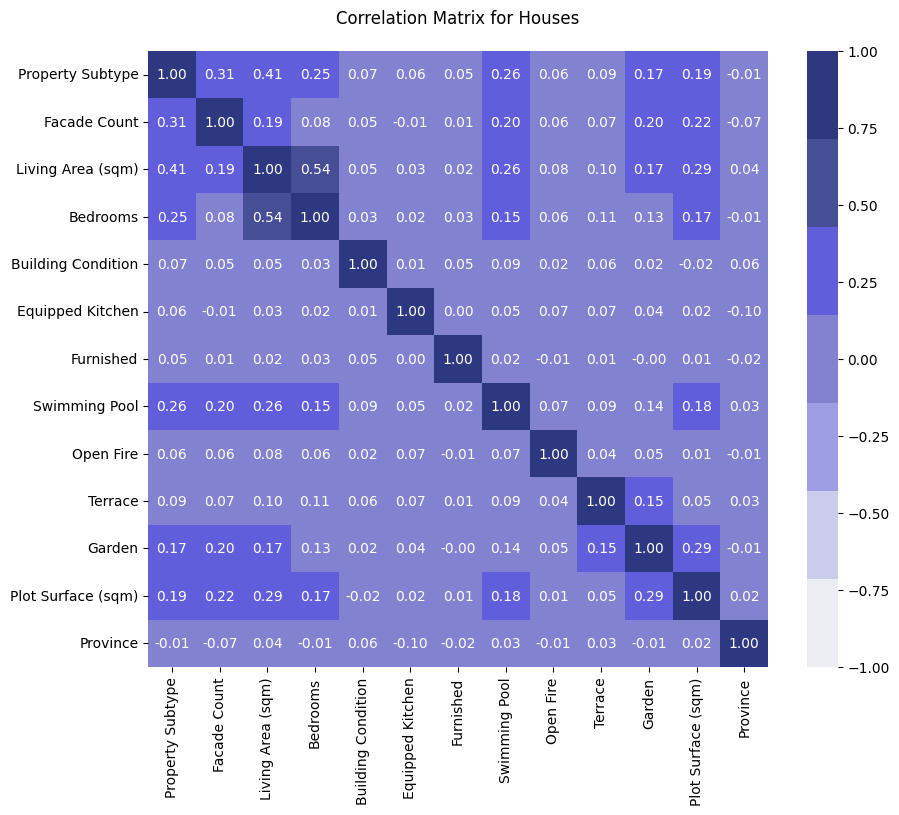

In [19]:
# Computing correlations for houses and apartments separately (excluding price)

# Filter the DataFrame for houses
corr_houses = num_dfc[num_dfc['type_of_property'] == 1].corr() \
            .drop(index=['type_of_property', 'price'], columns=['type_of_property', 'price']) \
            .rename(index=custom_labels, columns=custom_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_houses, annot=True, cmap=custom_cmap, fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix for Houses", pad=20)
plt.show()

**Evaluation of Correlations Between Features for Houses**

* Strong Relationships:
  * Living area & bedrooms (0.59): larger living areas come with more bedrooms
  * Property subtype & living area (0.41): we labeled subtypes based on price, thus more expensive subtypes tend to be bigger
  * Property subtype & facade count (0.31): The more expensive the subtype, the more facades
  * Plot surface & living area and 
  * Plot surface & garden (0.29): larger plots coincide often with larger living areas and are more likely to have gardens
  
* Other:
  * Swimming Pool & garden show some correlation with subtype and size of the property

* Weak or Negligible Relationships:
  * Furnished has an overall weak correlation with most other variables, suggesting this feature to be less likely for houses.
  * Province has slight negative correlations with features like Garden and Terrace, possibly hinting at regional trends.
  
-> The strong correlations align with real-world expectations (e.g. larger properties have more bedrooms, larger plots often include gardens). This consistency indicates that our data as well as our feature encoding and computation is logical (quality of our dataset, encoding and computation)

### Correlation Matrix Between Features for Apartments (Excluding Price)

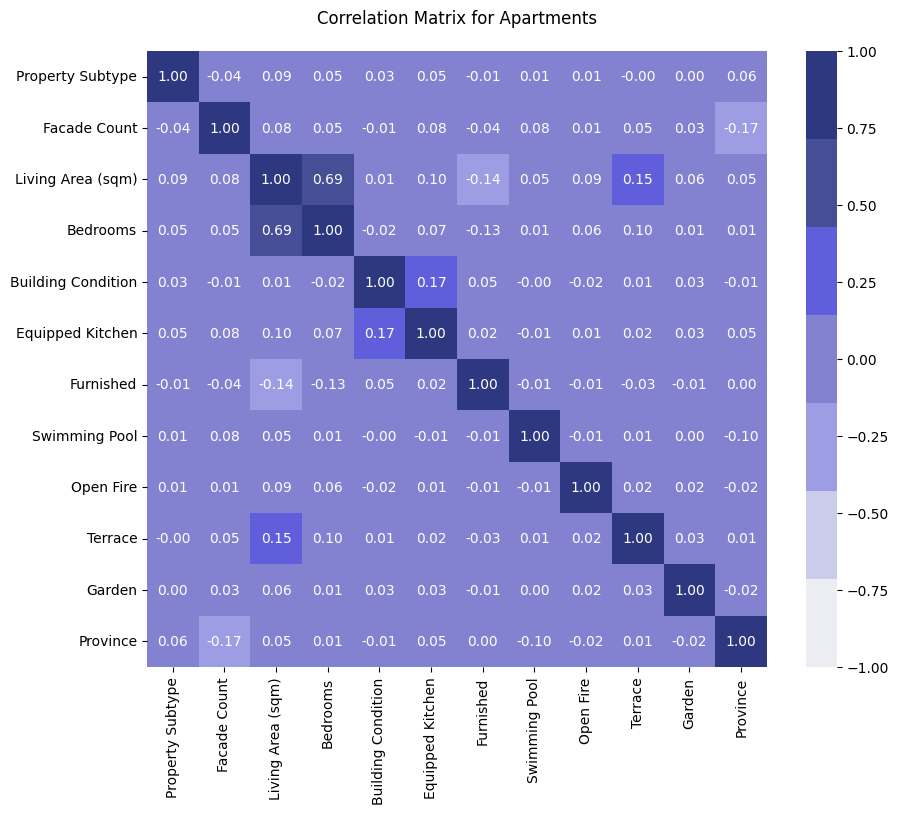

In [21]:
# Filter the DataFrame for apartments (excluding price)
corr_apartments = num_dfc[num_dfc['type_of_property'] == 0].corr() \
    .drop(index=['type_of_property', 'plot_surface', 'price'], columns=['type_of_property', 'plot_surface', 'price']) \
    .rename(index=custom_labels, columns=custom_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_apartments, annot=True, cmap=custom_cmap, fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix for Apartments", pad=20)
plt.show()

**Evaluation of Correlations Between Features for Apartments**

* Lower overall correlations.
  * The correlations in the apartment matrix are generally weaker compared to those for houses.
  * Less features with clear correlations

* Strong Correlation:
  * Living area and bedrooms (0.69): stronger than for houses with 0.54 -> apartments are more likely to have more rooms when they are bigger
  
* Slight Correlation:
  * Building condition and equipped kitchen (0.17): we can imagine that renovated apartments may come with equipped kitchen
  * Living area and terrace (0.15): larger apartments tend to come with terrace more than smaller ones -> for houses terrace is mostly related to garden
  
* Weak or No Correlation for Certain Features:
  * Garden, Swimming Pool, and Open Fire: have very weak to sometimes negative correlations with other features, highlighting that these features are rather unlikely for apartments

* Zero or Negative Correlations:
  * Living area and furnished (-0.14): For smaller apartments it's more likely to be furnished
  

**Summary:**

* Houses tend to have stronger correlations between features due to the presence of attributes like gardens, facades, and larger plot sizes, which strongly correlate with living area and property subtype.
* Apartments, have fewer features (e.g., gardens, facades) that correlate with other characteristics. The correlations are weaker overall, reflecting the more standardized nature of apartments in terms of size and feature availability.

### Correlation Matrix Between Price and Other Features for Houses & Apartments

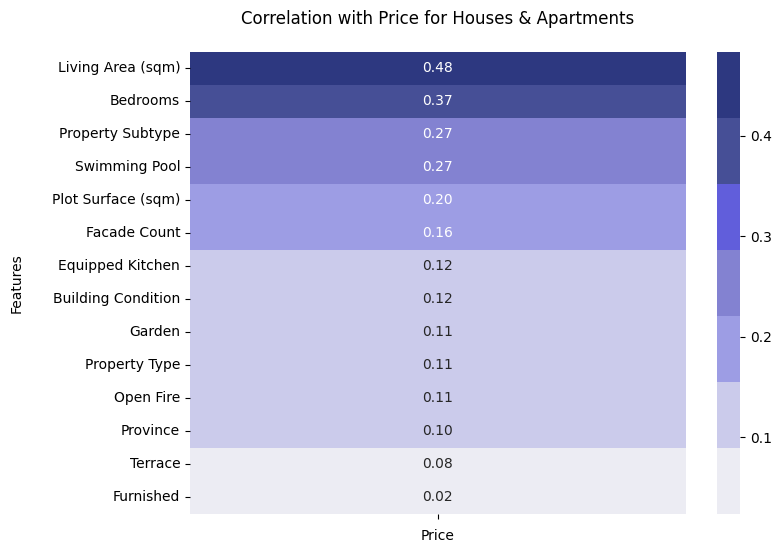

In [22]:
# Calculate the correlation matrix for all property types
corr_all_properties = num_dfc.corr().rename(index=custom_labels, columns=custom_labels)

# Select only correlations of 'price' with other features
corr_price = corr_all_properties[['price']].drop(index='price')

# Sort features by correlation with price
corr_price = corr_price.sort_values(by='price', ascending=False)

# Plot heatmap for all properties
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr_price, annot=True, cmap=custom_cmap, fmt=".2f", cbar=True)

# Remove or adjust the x-axis label
heatmap.set_xticklabels([''], rotation=0)  # Set to an empty string or rename it

plt.title("Correlation with Price for Houses & Apartments", pad=20)
plt.xlabel("Price")
plt.ylabel("Features", labelpad=20)
plt.show()

### Correlation Matrix Between Price for Houses

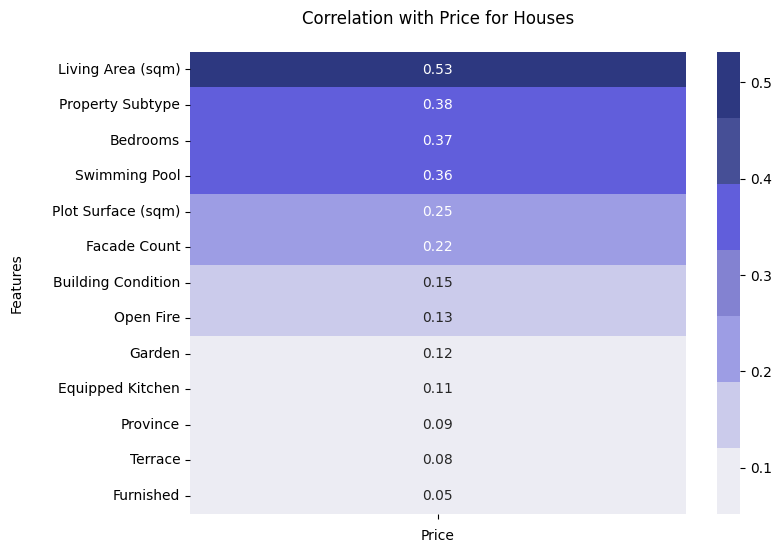

In [23]:
# Filter the DataFrame for houses (type_of_property == 1)
corr_houses = num_dfc[num_dfc['type_of_property'] == 1].corr() \
    .drop(index=['type_of_property'], columns=['type_of_property']) \
    .rename(index=custom_labels, columns=custom_labels)

# Select only correlations of 'price' with other features for houses
houses_corr_price = corr_houses[['price']].drop(index='price')

# Sort features by correlation with price
houses_corr_price = houses_corr_price.sort_values(by='price', ascending=False)

# Plot heatmap for houses
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(houses_corr_price, annot=True, cmap=custom_cmap, fmt=".2f", cbar=True)

# Remove or adjust the x-axis label
heatmap.set_xticklabels([''], rotation=0)  # Set to an empty string or rename it

plt.title("Correlation with Price for Houses", pad=20)
plt.xlabel("Price")
plt.ylabel("Features", labelpad=20)
plt.show()

**Evaluation of Correlations Between Price and Other Features For Houses**

The most important features regarding price are:

* Living area (the bigger the more expensive)
* Property subtype (since we ordered the subtypes by mean price)
* Number of bedrooms (aligns with living area)
* Swimming Pool (which is correlated to living area)
* Province -> locality

### Correlation Matrix Between Price and Other Features For Apartments

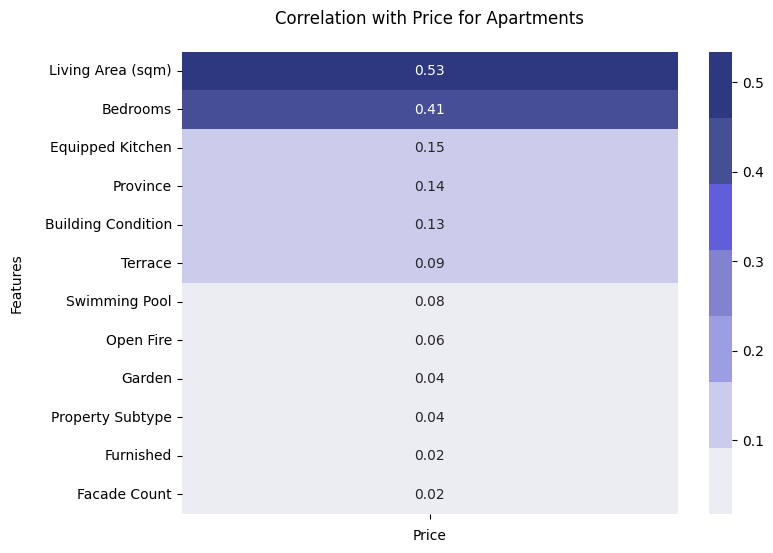

In [24]:
# Filter the DataFrame for apartments (type_of_property == 0)
corr_apartments = num_dfc[num_dfc['type_of_property'] == 0].corr() \
    .drop(index=['type_of_property', 'plot_surface'], columns=['type_of_property', 'plot_surface']) \
    .rename(index=custom_labels, columns=custom_labels)

# Select only correlations of 'price' with other features for apartments
apartments_corr_price = corr_apartments[['price']].drop(index='price')

# Sort features by correlation with price
apartments_corr_price = apartments_corr_price.sort_values(by='price', ascending=False)

# Plot heatmap for apartments
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(apartments_corr_price, annot=True, cmap=custom_cmap, fmt=".2f", cbar=True)

# Remove or adjust the x-axis label
heatmap.set_xticklabels([''], rotation=0)  # Set to an empty string or rename it

plt.title("Correlation with Price for Apartments", pad=20)
plt.xlabel("Price")
plt.ylabel("Features", labelpad=15)
plt.show()

**Evaluation of Correlations Between Price and Other Features**

Most important Features for Apartments:

- Living area (same as houses)
- Bedrooms (same)
- Province (same correlatio index, but higher in rank)
- Features like equipped kitchen and building condition

Logically weaker correlations:
- Swimming pool, open fire, garden since as we saw, overall weak correlations for apartments

Interesting/ surprising:

- Subtype of property have a much bigger impact on the price for houses than for apartments, probably since the luxury and extraordinary properties such as castles, manors, villas, etc. which have a high weight on price are more prevalent among houses than apartments

### Conclusion: Most and Least Important Features

**Most Important Features:**
* Living Area: Feature with biggest impact on price for houses and apartments
* Property Subtype: Less important for apartments, but large impact for houses
* Locality: Considerable impact for apartments as well as for houses
* Swimming Pool and Plot Surface: Less important for apartments but considerable impact on price for houses

Features such as number of bedrooms, of number of facades rank highly, but are closely connected with living area and can therefore be neglected.

**Least Important Features:**
* Furnished & Number of Facades: Features with lowest impact for apartments as well as houses.
* Open Fire: No significant impact
* Terrace Surface: Many properties have no information on the terrace surface, although it is indicated that a terrace exists. Since for an analysis of the terrace surface in correlation with price, the data is not sufficient, we would only focus on the question, if a terrace exists or not. 

## Correlation of Price and Living Area

### Correlation of Price and Living Area (incl. Outliers)

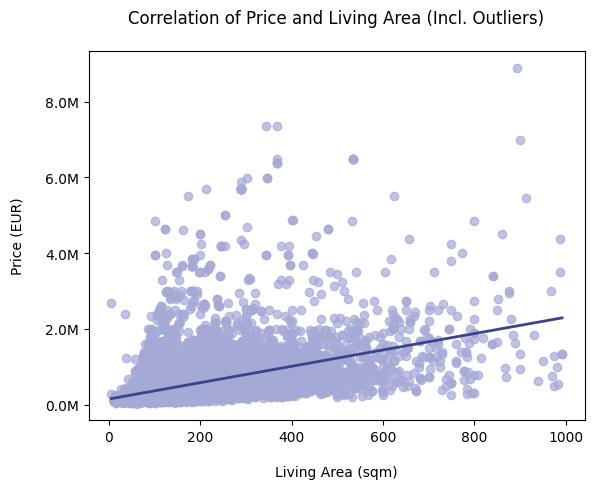

In [30]:
# Exploring relationships between price and other features (Price & Living Area incl. Outliers)

# Scatterplot with regression line
sns.regplot(
    x="living_area",
    y="price",
    data=dfc,  # data
    scatter_kws={"color": "#a5a9d6", "alpha": 0.7},  # Dots with lighter matching color
    line_kws={"color": "#3a438b", "lw": 2},  # Regression line color and width
    ci=None  # Remove confidence interval shading
)

# Format y-axis as millions
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{round(float(x / 1_000_000), 2)}M"))

# Labels and title
plt.xlabel("Living Area (sqm)", labelpad=15)
plt.ylabel("Price (EUR)", labelpad=15)
plt.title("Correlation of Price and Living Area (Incl. Outliers)", pad=20)

# Show the plot
plt.show()

### Excluding Outliers

In [ ]:
# Calculate mean and standard deviation for price
mean_price = statistics.mean(dfc["price"])
std_price = statistics.stdev(dfc["price"])

# Calculate mean and standard deviation for living area
mean_area = statistics.mean(dfc["living_area"])
std_area = statistics.stdev(dfc["living_area"])

# Define lower and upper bounds (price)
price_lower_bound = mean_price - 3 * std_price
price_upper_bound = mean_price + 3 * std_price

# Define lower and upper bounds (living area)
area_lower_bound = mean_area - 3 * std_area
area_upper_bound = mean_area + 3 * std_area

# Filter out outliers
filtered_dfc = dfc[
    (dfc["price"] >= price_lower_bound) & (dfc["price"] <= price_upper_bound) &
    (dfc["living_area"] >= area_lower_bound) & (dfc["living_area"] <= area_upper_bound)
]

#### Comparing Price Range and Range of Living Area With and Without Outliers

In [33]:
print("Original price range:", dfc["price"].min(), "-", dfc["price"].max())
print("Filtered price range:", filtered_dfc["price"].min(), "-", filtered_dfc["price"].max())
print("Original living area range:", dfc["living_area"].min(), "-", dfc["living_area"].max())
print("Filtered living area range:", filtered_dfc["living_area"].min(), "-", filtered_dfc["living_area"].max())

Original price range: 27500.0 - 8900000.0
Filtered price range: 27500.0 - 1750000.0
Original living area range: 5 - 992
Filtered living area range: 5 - 435


#### Adjusting Filtered DataFrame to Adjust Lower Bound of Living Area to Exclude Error

In [38]:
# Filter out outliers
filtered_dfc = dfc[
    (dfc["price"] >= price_lower_bound) & (dfc["price"] <= price_upper_bound) &
    (dfc["living_area"] >= 12) & (dfc["living_area"] <= area_upper_bound)
]

### Correlation of Price and Living Area (excl. Outliers)

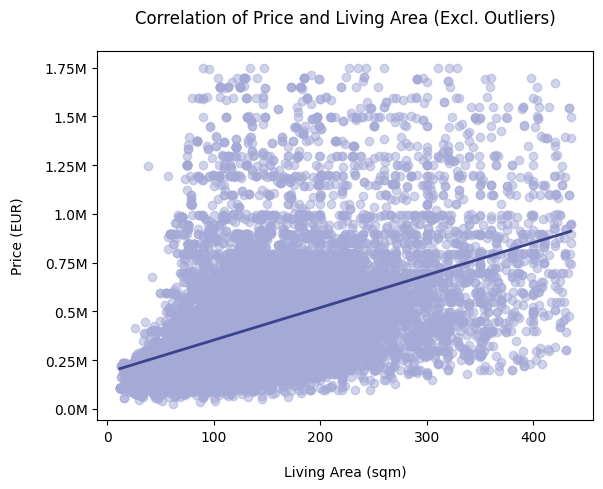

In [39]:
# Scatterplot with regression line
sns.regplot(
    x="living_area",
    y="price",
    data=filtered_dfc,  # Filtered data
    scatter_kws={"color": "#a5a9d6", "alpha": 0.5},  # Dots with lighter matching color
    line_kws={"color": "#3a438b", "lw": 2},  # Regression line color and width
    ci=None  # Remove confidence interval shading
)

# Format y-axis as millions
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{round(float(x / 1_000_000), 2)}M"))

# Labels and title
plt.xlabel("Living Area (sqm)", labelpad=15)
plt.ylabel("Price (EUR)", labelpad=15)
plt.title("Correlation of Price and Living Area (Excl. Outliers)", pad=20)

# Show the plot
plt.show()

### Average Price per Range of Living Area (incl. Outliers)

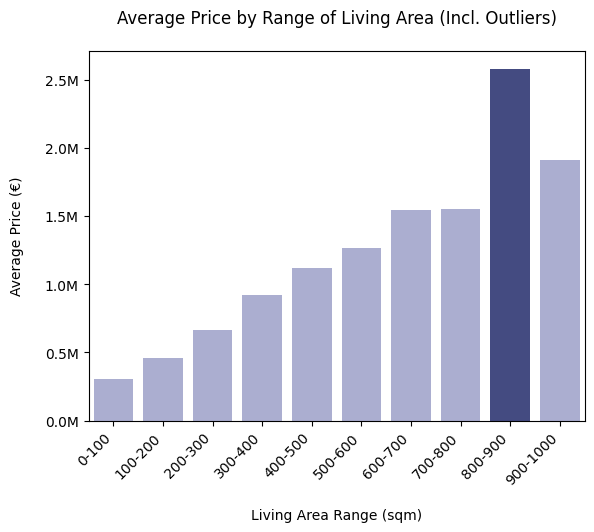

In [42]:
# Define bins and labels
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
labels = ["0-100", "100-200", "200-300", "300-400", "400-500", "500-600", "600-700", "700-800", "800-900", "900-1000"]

dfc["living_area_bin"] = pd.cut(dfc["living_area"], bins=bins, labels=labels)

# Aggregate data
agg_data = dfc.groupby("living_area_bin", observed=False)["price"].mean().reset_index()

# Define custom colors: lighter for most, darker for the 9th
colors = ["#a5a9d6"] * len(labels)  # Light shade for all
colors[8] = "#3a438b"  # Darker shade for the 9th bar (index 8)

# Plot
sns.barplot(
    x="living_area_bin",
    y="price",
    data=agg_data,
    palette=colors,  # Apply custom color palette
    hue=agg_data["living_area_bin"], # Set hue explicitely
    dodge=False,       # Ensure bards are not split
    legend=False       # Remove the hue legend
)

# Format y-axis as millions
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{round(float(x / 1_000_000), 2)}M"))

# Labels and title
plt.xticks(rotation=45, ha="right")
plt.title("Average Price by Range of Living Area (Incl. Outliers)", pad=20)
plt.xlabel("Living Area Range (sqm)", labelpad=15)
plt.ylabel("Average Price (€)", labelpad=15)

# Show the plot
plt.show()


### Average Price per Range of Living Area (excl. Outliers)

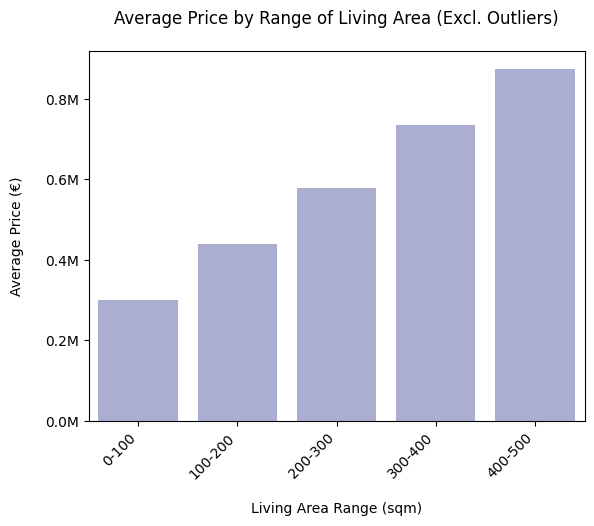

In [47]:
# Define bins and labels
bins = [0, 100, 200, 300, 400, 500]
labels = ["0-100", "100-200", "200-300", "300-400", "400-500"]

# Create living_area_bin column safely using .loc
filtered_dfc = filtered_dfc.copy()  # Ensure it's a copy, not a view
filtered_dfc.loc[:, "living_area_bin"] = pd.cut(filtered_dfc["living_area"], bins=bins, labels=labels)

# Aggregate data using the filtered DataFrame
agg_data = filtered_dfc.groupby("living_area_bin", observed=False)["price"].mean().reset_index()

# Bar plot
sns.barplot(
    x="living_area_bin",
    y="price",
    data=agg_data,
    color="#a5a9d6"  # Custom bar color
)

# Format y-axis as millions
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{round(float(x / 1_000_000), 2)}M"))

# Labels and Title
plt.xticks(rotation=45, ha="right")
plt.title("Average Price by Range of Living Area (Excl. Outliers)", pad=20)
plt.xlabel("Living Area Range (sqm)", labelpad=15)
plt.ylabel("Average Price (€)", labelpad=15)

# Show the plot
plt.show()


**Evaluation of Correlation Between Living Area and Average Price**

* Both, the scatterplots and the bar plots show a similar trend with and without outliers, with steadily increasing price per increasing living area. 
* The comparison between the plots with and without outliers show however however a sharp cut in the dataset and since the data points calculated as outliers represent for the most part valid properties, we decided to include them.
* The only excluded data points are properties below 12 sqm as the price and other features show that these data points are errors.
* The impact of the outliers are most visible in the bar plot showing the distribution of the average price per range of living area, where they lead to the range from 800-900 sqm to be the most expensive.

## Histogram of Number of Properties According to their Surface

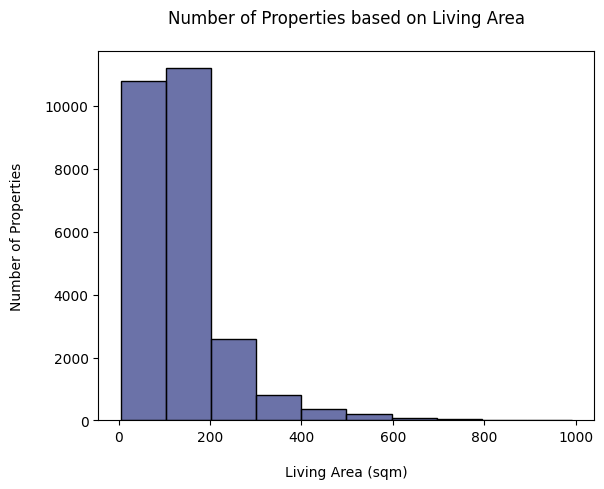

In [ ]:
# Histogram for the distribution of living area
sns.histplot(dfc["living_area"], kde=False, bins=10, color="#3a438b")

# Adding labels and title
plt.xlabel("Living Area (sqm)", labelpad=15)
plt.ylabel("Number of Properties", labelpad=15)
plt.title("Number of Properties based on Living Area", pad=20)

# Show the plot
plt.show()

**Evaluation of the Distribution of Properties Based on Living Area**

* Shows a concentration of data points up to 200 sqm. 

* This confirms our calculation of outliers and the findings from the scatterplot above.